## Supervised Learning Lab

### 1. Evolution of Machine Learning

Machine Learning (ML) has evolved significantly over the past decades:

- **1950s–1960s**: Foundations of AI; perceptron algorithms.
- **1970s–1980s**: Symbolic AI and rule-based systems.
- **1990s**: Rise of statistical learning; support vector machines.
- **2000s**: Ensemble methods (Random Forest, Boosting).
- **2010s–present**: Deep learning breakthroughs; big data era.
ML now encompasses various approaches where we teach machines to learn patterns from data.

### 2. Taxonomy of Machine Learning Approaches

Supervised learning is one umbrella under which multiple algorithms reside. Other major approaches:

| Approach            | Definition                                                    | Techniques (examples)                     |
|---------------------|---------------------------------------------------------------|-------------------------------------------|
| **Supervised**      | Learn from labeled data to predict outcomes.                  | Regression, Classification (e.g., LR, RF) |
| **Unsupervised**    | Discover structure in unlabeled data.                         | Clustering (K-Means), Dim. Reduction (PCA) |
| **Reinforcement**   | Learn via trial-and-error and rewards.                        | Q-Learning, Policy Gradients             |
| **Semi-supervised** | Combine small labeled with large unlabeled datasets.          | Self-training, Co-training               |

### 3. Applications Across ML Approaches

In [1]:
applications = {
    'Supervised': ['Email spam detection', 'Credit scoring', 'Medical diagnosis'],
    'Unsupervised': ['Customer segmentation', 'Anomaly detection'],
    'Reinforcement': ['Game playing (AlphaGo)', 'Robotics'],
    'Semi-supervised': ['Web page classification', 'Speech recognition'],
}
for approach, apps in applications.items():
    print(f"{approach}: {', '.join(apps)}")

Supervised: Email spam detection, Credit scoring, Medical diagnosis
Unsupervised: Customer segmentation, Anomaly detection
Reinforcement: Game playing (AlphaGo), Robotics
Semi-supervised: Web page classification, Speech recognition


### 4. What is Supervised Learning?

**Definition**: Train models on input–output pairs to learn a mapping from features (X) to target (y).

**Workflow**:
1. Problem definition
2. Data collection & cleaning
3. Feature engineering
4. Model training
5. Evaluation
6. Tuning & deployment

**Key Terms**: Features, Target, Training/Test sets, Overfitting, Underfitting, Hyperparameters.

**Common Python Libraries**: `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`.

## 5. Popular Supervised Models & Use Cases

| Model                | Type           | Use Case                           |
|----------------------|----------------|------------------------------------|
| Linear Regression    | Regression     | House price prediction             |
| Logistic Regression  | Classification | Titanic survival, spam detection   |
| Decision Trees       | Both           | Customer churn                     |
| Random Forest        | Both           | Tabular data classification/regression |
| K-Nearest Neighbors  | Both           | Image recognition (small datasets) |
| Support Vector Machine | Both         | Text classification                |

- **Regression Problems**:
  - Target variable is continuous (e.g., predicting house prices, temperatures).
  - Common metrics: Mean Squared Error (MSE), Root MSE (RMSE), R² score

- **Classification Problems**:
  - Target variable is categorical (e.g., survived/deceased, spam/not spam).
  - Common metrics: Accuracy, Precision, Recall, F1-Score, AUC.

### 6. Titanic Survival Prediction - A Classification Problem

- **Objective**: Predict `Survived` (0 or 1) for each passenger.

### 7. Logistic Regression

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
# y = mx + c
# y = wx + b

In [4]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# preprocessing data
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X = df[features].copy()
y = df['Survived']
X = pd.get_dummies(X, columns=['Sex','Embarked'], drop_first=True)

In [6]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         714 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    bool   
 6   Embarked_Q  891 non-null    bool   
 7   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 37.5 KB


In [8]:
X['Age'] = X['Age'].fillna(X['Age'].median())

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    bool   
 6   Embarked_Q  891 non-null    bool   
 7   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 37.5 KB


In [10]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [11]:
# Split
def train_eval(model):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y,random_state=42)

# X_train & y_train - data to use in training the logistic regression model
# X_test & y_test - data to use for testing the trained model
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    print(f"{model.__class__.__name__} -> Acc: {accuracy_score(y_test,y_pred):.3f}, AUC: {roc_auc_score(y_test,y_proba):.3f}")
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {model.__class__.__name__}")
    plt.show()

Logistic Regression Results
LogisticRegression -> Acc: 0.804, AUC: 0.844
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



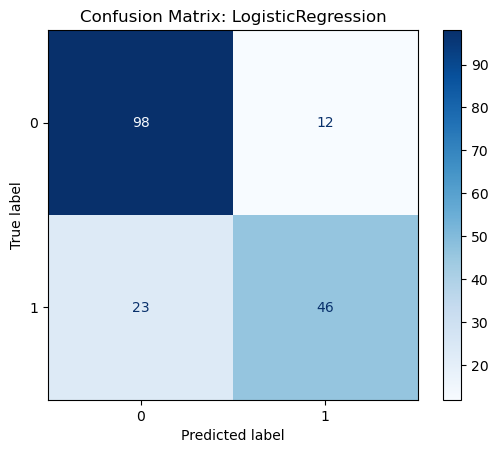

In [12]:
# Train & evaluate
print("Logistic Regression Results")
train_eval(LogisticRegression(max_iter=1000))

### 8. Model 2: Random Forest


Random Forest Results
RandomForestClassifier -> Acc: 0.804, AUC: 0.844
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       110
           1       0.77      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



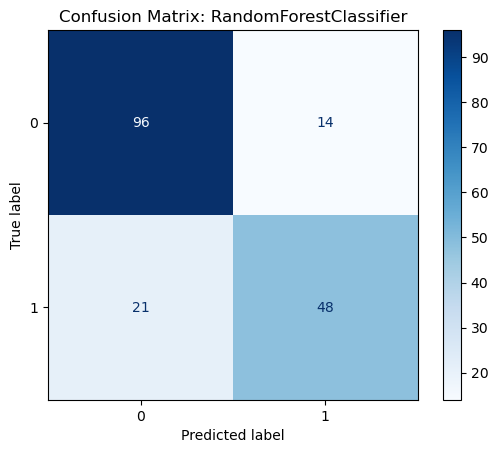

In [13]:
from sklearn.ensemble import RandomForestClassifier

print("\nRandom Forest Results")
train_eval(RandomForestClassifier(n_estimators=50, random_state=42))

### 9. Model Choice Rationale and Comparison

- **Logistic Regression**: Interpretable, fast, good baseline.
- **Random Forest**: Captures nonlinearities and interactions.

### 10. Evaluation Metrics for Classification Models

#### A. Confusion Matrix.
A table of prediction outcomes:
- **TP (True Positive)**: Correctly predicted positive.
- **FP (False Positive)**: Incorrectly predicted positive.
- **TN (True Negative)**: Correctly predicted negative.
- **FN (False Negative)**: Incorrectly predicted negative.

#### B. Precision
- **Formula**: TP / (TP + FP)
- **When to use**: When false positives are costly.  
  e.g., Fraud detection: minimize falsely flagging legitimate transactions.

#### C. Recall
- **Formula**: TP / (TP + FN)
- **When to use**: When false negatives are costly.  
  e.g., Disease screening: avoid missing actual cases.

#### D. F1-Score
- **Formula**: 2 * (Precision * Recall) / (Precision + Recall)
- **When to use**: Balance between precision and recall; useful for imbalanced classes.

#### E. Accuracy
- **Formula**: (TP + TN) / (TP + TN + FP + FN)
- **When to use**: When class distribution is balanced and all errors are equally important.
  
- **Caution**: Can be misleading with imbalanced data.

#### F. AUC (Area Under ROC Curve)
- Measures model’s ability to distinguish classes across thresholds.
- **When to use**: Compare models regardless of classification threshold, especially under imbalance.

### 11. Fuel Efficiency Prediction - A Regression Problem

- **Objective**: Predicting a vehicle's fuel efficiency the outputs the miles per gallon (MPG), a standard car measure for fuel efficiency

In [14]:
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('auto-mpg.csv')

In [16]:
display(df.head(), df.tail())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [17]:
df=df.drop(columns='car name', axis=1)

In [18]:
df=df.rename(columns={'model year':'model_year'})
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [19]:
df.shape

(398, 8)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [42]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object

In [43]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [21]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [22]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce') # convert the non numeric data into NaN
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median()) #filling the NaN values with median values
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object

<Axes: >

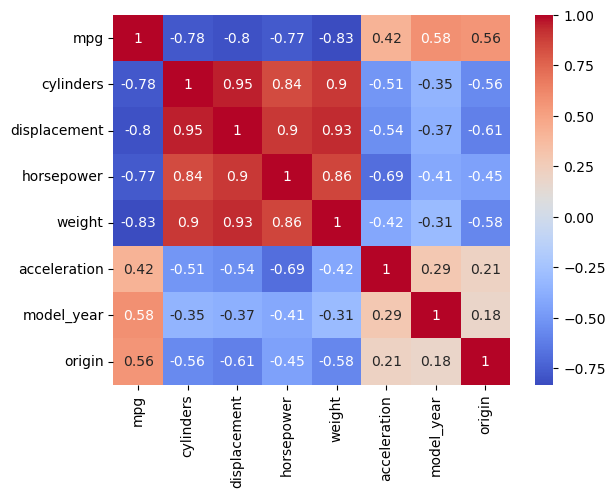

In [23]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

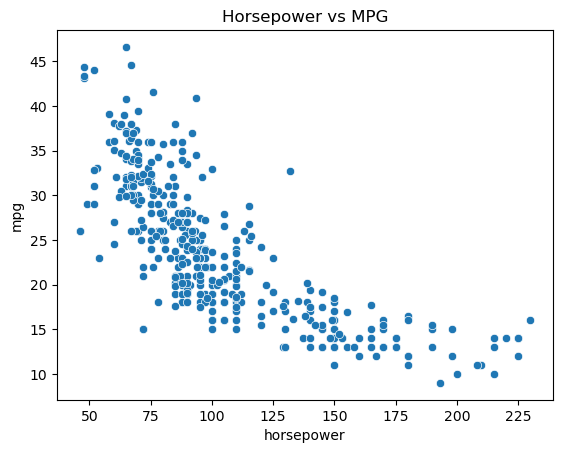

In [34]:
# scatter plot
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title('Horsepower vs MPG')
plt.show()

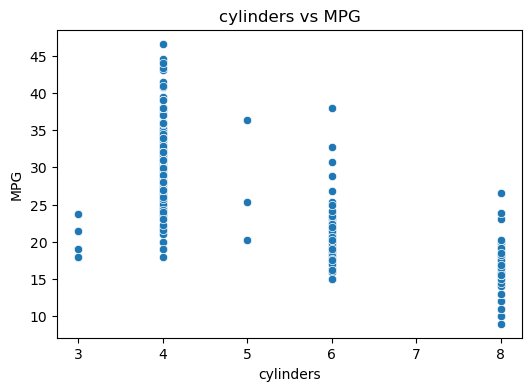

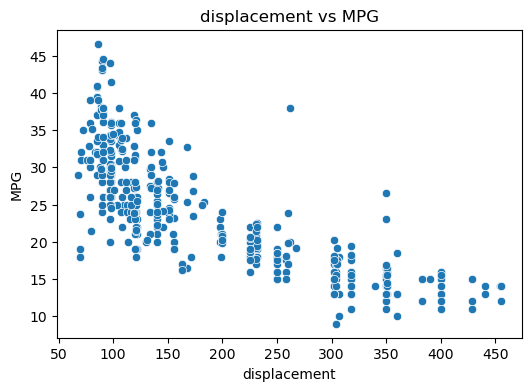

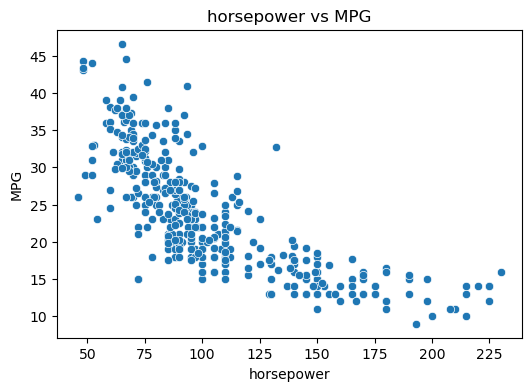

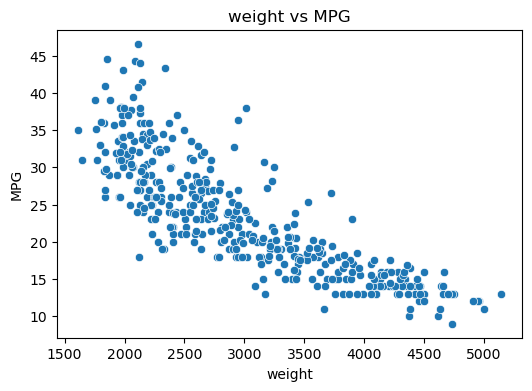

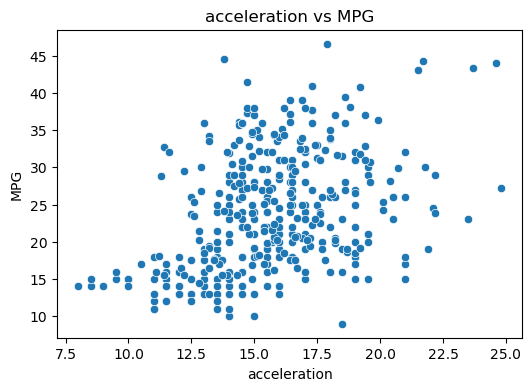

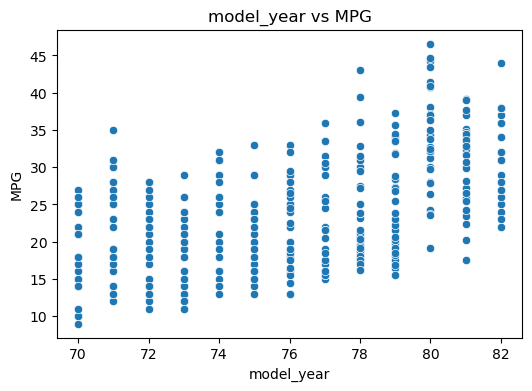

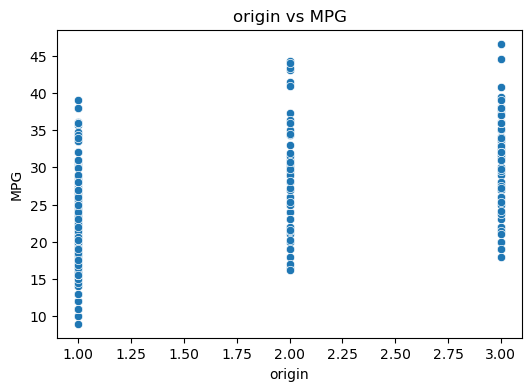

In [36]:
numeric_features = df.select_dtypes(include=['number']).columns.drop('mpg')
# scatter plots for each numeric feature vs mpg
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['mpg'])
    plt.title(f'{feature} vs MPG')
    plt.xlabel(feature)
    plt.ylabel('MPG')
    plt.show()

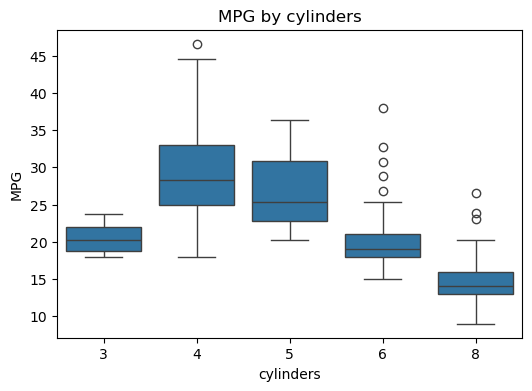

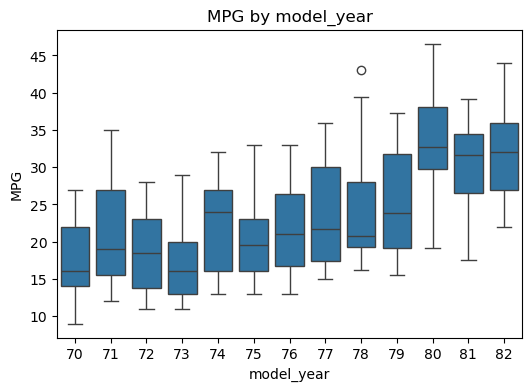

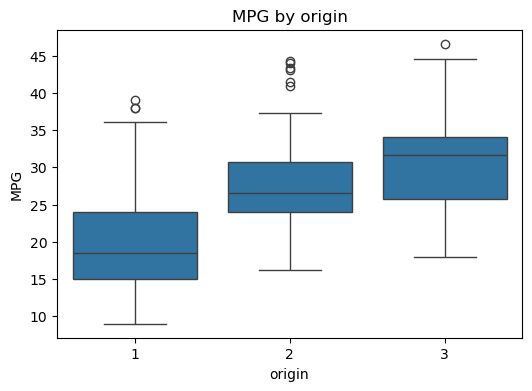

In [37]:
categorical_features = ['cylinders', 'model_year', 'origin']
# boxplots for each categorical feature vs mpg
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature], y=df['mpg'])
    plt.title(f'MPG by {feature}')
    plt.xlabel(feature)
    plt.ylabel('MPG')
    plt.show()

#### 12. Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
X = df.drop(columns=['mpg'])
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
lr=LinearRegression()

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

#### 13. Model Evaluation

In [28]:
y_pred = lr.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score #mean_absolute_error, mean_absolute_percentage_error

In [44]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 8.197746885824987
Root Mean Squared Error: 2.8631707748272697
R-squared: 0.8475304239212401


The model achieved the following performance metrics:
* Mean Squared Error (MSE): 8.20
* R-squared (R²): 0.85
* Root Mean Squared Error (RMSE): ≈ 2.86

These metrics indicate that the model is performing well, capturing about 85% of the variance in the target variable and maintaining a low average prediction error.

In [31]:
def plot_pred_vs_actual(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Predicted vs. Actual Values')
    plt.show()

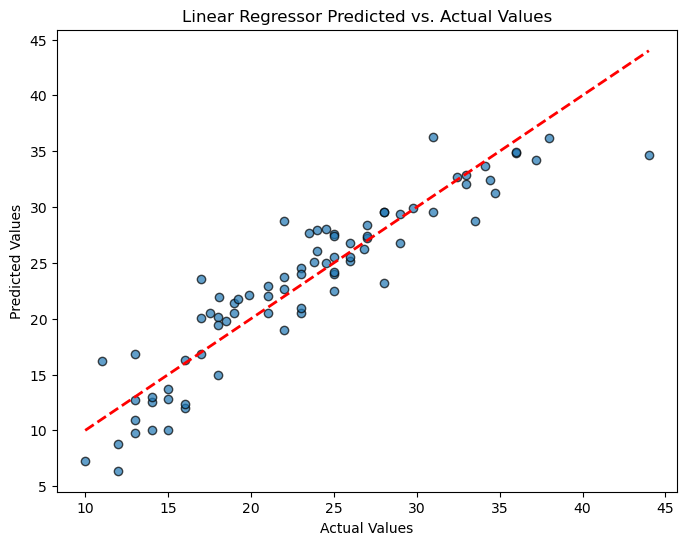

In [32]:
plot_pred_vs_actual(y_test, y_pred, 'Linear Regressor')

##### Visual Interpretation
The scatter plot comparing predicted vs. actual MPG values shows a strong linear trend along the 45-degree red line. Most predictions closely follow the ideal line, indicating that the model is making accurate and consistent predictions. Minor deviations are observed, but no major outliers or systematic bias are present.